# This project is created by Vihan Parmar. 

## Reading the dataset and understanding the features and target variable.

In [ ]:
#Importing pandas library for reading the dataset.

import pandas as pd

In [ ]:
# Mounting my Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset
# Enlisting the names of various attributes as per the information given for this dataset
# Reading the first 20 

QB = pd.read_csv('/content/drive/MyDrive/Unsupervised Learning Project Data/drive-download-20191118T133407Z-001.zip (Unzipped Files)/Qualitative_Bankruptcy.data.txt',names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])
QB.head(20)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


**The Class is represented by categorical variables. This class consists of 2 categories, namely:  Bankruptcy or Non-Bankruptcy which will be the target variable that our model will predict just like human experts predict based on the other set of variables. Hence Class will be the target variable.**

In [ ]:
# Understanding the dimensions

QB.describe

<bound method NDFrame.describe of     Industrial Risk Management Risk  ... Operating Risk Class
0                 P               P  ...              P    NB
1                 N               N  ...              N    NB
2                 A               A  ...              A    NB
3                 P               P  ...              P    NB
4                 N               N  ...              N    NB
..              ...             ...  ...            ...   ...
245               N               N  ...              N     B
246               P               N  ...              N     B
247               A               N  ...              N     B
248               N               N  ...              N     B
249               P               N  ...              A     B

[250 rows x 7 columns]>

# Stage 1. Pre-procssing

## Seperating the data into dependent and independent features.

In [ ]:
# x will be the set of independent features/variable.

x = QB.iloc[:,0:6] # Indexing all rows and then columns from (0 - 6)
x.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [ ]:
QB.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [ ]:
# y will be the dependent/target variable.

y = QB.iloc[:,6:7] # Indexing all rows and the Target column 'Class'
y.head(10)

,Class
0,NB
1,NB
2,NB
3,NB
4,NB
5,NB
6,NB
7,NB
8,NB
9,NB


## Encoding independent features.

In [ ]:
# Here I have used Label Encoder in order to transform non-numerical labels into numerical labels
# Here I have used fit transform on the Label Enocded Data to ensure that the data is brought to the same scale. 
# After label encoding - we see that the various attributes representing P, A, N are converted in the following numerical labels 2,1,0  

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x = x.apply(LE.fit_transform)

In [ ]:
x

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1
...,...,...,...,...,...,...
245,1,1,0,1,1,1
246,2,1,1,1,1,1
247,0,1,1,1,1,1
248,1,1,1,1,1,1


In [ ]:
# After Label encoding - one issue that can arise is that the computer will think that these numerical lables are in a hierarchy. This will in turn give more priority with the
#labels having a higher number. 

# In order to resolve this issue of hierarchy, we will convert these lables into dummy variables using get_dummies - here there is equal weightage given to all the labels and there is no bias. 
# get_dummies has basically taken every column and for each column it has marked 1 for exists and 0 for does not exist - these are basically binary vectors 
# This has marked 1 for each of the distinct categories P , A , N in every column. 

x = pd.get_dummies(x,columns= x.columns)
x

,Industrial Risk_0,Industrial Risk_1,Industrial Risk_2,Management Risk_0,Management Risk_1,Management Risk_2,Financial Flexibility_0,Financial Flexibility_1,Financial Flexibility_2,Credibility_0,Credibility_1,Credibility_2,Competitiveness_0,Competitiveness_1,Competitiveness_2,Operating Risk_0,Operating Risk_1,Operating Risk_2
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
246,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
247,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
248,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
x.dtypes

Industrial Risk_0          uint8
Industrial Risk_1          uint8
Industrial Risk_2          uint8
Management Risk_0          uint8
Management Risk_1          uint8
Management Risk_2          uint8
Financial Flexibility_0    uint8
Financial Flexibility_1    uint8
Financial Flexibility_2    uint8
Credibility_0              uint8
Credibility_1              uint8
Credibility_2              uint8
Competitiveness_0          uint8
Competitiveness_1          uint8
Competitiveness_2          uint8
Operating Risk_0           uint8
Operating Risk_1           uint8
Operating Risk_2           uint8
dtype: object

## Encoding the dependent feature too.

In [ ]:
y.iloc[:,0] = LE.fit_transform(y.iloc[:,0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
245,0
246,0
247,0
248,0


## Splitting the dataset into training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12345)

In [ ]:
print("The shape of x_train is:",x_train.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of x_test is:",x_test.shape)
print("The shape of y_test is:",y_test.shape)

The shape of x_train is: (200, 18)
The shape of y_train is: (200, 1)
The shape of x_test is: (50, 18)
The shape of y_test is: (50, 1)


# Stage 2. PCA Algorithm

## Applying PCA on the independent features of the train data.

In [ ]:
# Using standard scalar to standardize the features on the dataset by scaling them to unit variance

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.fit_transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
Pca = PCA(random_state = 12)
Pca.fit(x_train_std)

PCA(random_state=12)

In [ ]:
# Checking number of PCA components

Pca.n_components_

18

In [ ]:
# Printing to check the values for the 18 PCA components

print(Pca.components_)

[[-0.09188721  0.14646499 -0.0538946  -0.0988248   0.26683107 -0.20754208
  -0.25285351  0.39390362 -0.19171752 -0.1385109   0.37574522 -0.25420548
  -0.18724338  0.42024835 -0.26568496 -0.01740286  0.20192233 -0.19745318]
 [ 0.47255617 -0.35852026 -0.11754938  0.48821774 -0.29316532 -0.17324314
   0.03465756  0.12972706 -0.18691929 -0.16366466  0.15385083 -0.00087683
  -0.10298229  0.06836228  0.02171869  0.33698893 -0.18565263 -0.11320529]
 [-0.13884697  0.19036977 -0.05049046  0.17045719  0.04039955 -0.22740618
  -0.22883097 -0.11888439  0.37813891 -0.10397209 -0.05793423  0.16013833
  -0.42629289 -0.09040152  0.47492541  0.15573951  0.20424772 -0.35889985]
 [-0.19211476 -0.38876395  0.5823071   0.15557123 -0.26361155  0.14379827
  -0.08927562  0.0190402   0.07160724 -0.20135187  0.23315892 -0.04637549
  -0.15759485  0.03846086  0.10145252 -0.38638161  0.21238285  0.13030628]
 [ 0.02436989 -0.14277669  0.1182256   0.09161116 -0.04852753 -0.04008865
  -0.26496949 -0.02509091  0.30722

In [ ]:
# This explains the variance among 18 PCA components 

print(Pca.explained_variance_)

[4.74284560e+00 2.13909829e+00 1.90424209e+00 1.79233950e+00
 1.48311285e+00 1.34313376e+00 1.25946303e+00 1.07493802e+00
 9.40927056e-01 7.84188119e-01 4.21303931e-01 2.04860015e-01
 2.79861477e-31 2.20476897e-31 1.29209331e-31 8.09042142e-32
 5.62474217e-32 2.78521261e-32]


## Displaying elbow plot to find the reduced number of dimensions.

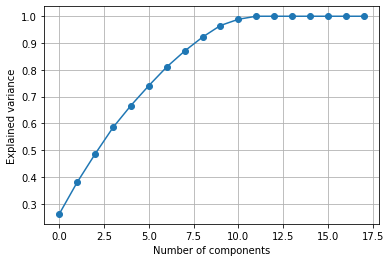

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.plot(range(0,Pca.n_components_),np.cumsum(Pca.explained_variance_ratio_),marker='o')
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.grid()
plt.show()

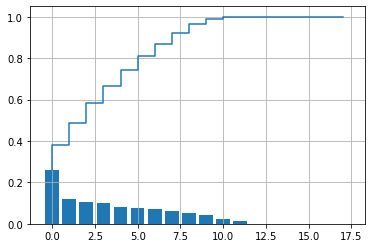

In [ ]:
plt.step(range(0,Pca.n_components_),np.cumsum(Pca.explained_variance_ratio_))
plt.bar(range(0,Pca.n_components_),Pca.explained_variance_ratio_)
plt.grid()

## Here we can see that there are 10 PCA components representing approximately 90% of the data, therefore these 10 components seem to be the appropriate PCA components to reduce the dimension space to.   

## Transforming the data using PCA.

In [ ]:
# Here we reduce the dimensions to 10 as we found in the elbow plot and compare the original dimensions with the new dimension space in the training data
# I won’t use the Y when creating the principal components. Because I don’t want the PCA algorithm to know which class (digit) a particular row belongs to
Pca = PCA(n_components = 10, random_state = 12345)
x_train_std_Pca = Pca.fit_transform(x_train_std)
print("original shape:   ", x_train_std.shape)
print("transformed shape:", x_train_std_Pca.shape)

original shape:    (200, 18)
transformed shape: (200, 10)


In [ ]:
x_train_std_Pca = pd.DataFrame(x_train_std_Pca)

In [ ]:
# Verifying if the number of componenets in the dimension space has been reduced to 10

Pca.n_components_

10

In [ ]:
# Cheking the explained variance among 10 PCA componenets 

Pca.explained_variance_

array([4.7428456 , 2.13909829, 1.90424209, 1.7923395 , 1.48311285,
       1.34313376, 1.25946303, 1.07493802, 0.94092706, 0.78418812])

In [ ]:
# Checking 10 PCA components values

Pca.components_

array([[-0.09188721,  0.14646499, -0.0538946 , -0.0988248 ,  0.26683107,
        -0.20754208, -0.25285351,  0.39390362, -0.19171752, -0.1385109 ,
         0.37574522, -0.25420548, -0.18724338,  0.42024835, -0.26568496,
        -0.01740286,  0.20192233, -0.19745318],
       [ 0.47255617, -0.35852026, -0.11754938,  0.48821774, -0.29316532,
        -0.17324314,  0.03465756,  0.12972706, -0.18691929, -0.16366466,
         0.15385083, -0.00087683, -0.10298229,  0.06836228,  0.02171869,
         0.33698893, -0.18565263, -0.11320529],
       [-0.13884697,  0.19036977, -0.05049046,  0.17045719,  0.04039955,
        -0.22740618, -0.22883097, -0.11888439,  0.37813891, -0.10397209,
        -0.05793423,  0.16013833, -0.42629289, -0.09040152,  0.47492541,
         0.15573951,  0.20424772, -0.35889985],
       [-0.19211476, -0.38876395,  0.5823071 ,  0.15557123, -0.26361155,
         0.14379827, -0.08927562,  0.0190402 ,  0.07160724, -0.20135187,
         0.23315892, -0.04637549, -0.15759485,  0.038

# Stage 3. K-Means Algorithm

## Applying KMeans algorithm on the above transformed data.

In [ ]:
cluster_errors = []
distortion = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance

#importing cluster of diff. sizes to check for erros

cluster_range = range(1,10)

for i in cluster_range:
    clusters = KMeans(i, n_init = 5)
    clusters.fit(x_train_std_Pca)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    distortion.append(sum(np.min(distance.cdist(x_train_std_Pca, centroids, 'euclidean'), axis = 1))/ x_train_std_Pca.shape[0])
    
clusters_df= pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,3475.393375
1,2,2632.816767
2,3,2353.739040
3,4,2143.707943
4,5,1968.279224
5,6,1843.796641
6,7,1724.898808
7,8,1639.266537
8,9,1544.956136


## Selecting the optimal number of clusters and forming clusters out of train data.

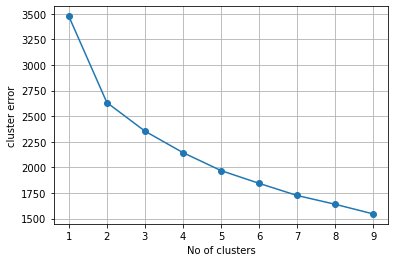

In [ ]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('cluster error')
plt.grid()

## Looking at the Elbow Plot we can see that there are 4 optimal clusters in the data 



In [ ]:
Final_clusters = KMeans(n_clusters = 4, n_init = 4)
Final_clusters.fit(x_train_std_Pca)
labels = Final_clusters.labels_

In [ ]:
x_train_std_Pca

,0,1,2,3,4,5,6,7,8,9
0,2.134214,-0.319978,-1.361100,1.562808,0.085764,-1.811120,-1.167633,-0.477127,0.059051,0.868368
1,1.862059,-0.484865,0.169737,-2.603051,1.364461,-0.827302,-0.456877,-0.780913,-0.950436,-0.708922
2,-0.567225,-1.847852,-0.293183,-1.613688,-2.315484,-0.017622,2.289386,0.603597,0.817742,-0.210604
3,2.075016,-1.284581,0.789884,-0.930569,-1.794389,0.529445,-0.120086,0.017031,0.373042,-0.111263
4,-0.452854,-2.359235,1.092952,-1.249425,-1.014174,0.060225,0.739082,2.296367,1.814015,-0.302169
...,...,...,...,...,...,...,...,...,...,...
195,2.210393,1.215315,0.114431,2.586103,0.265582,0.016335,0.854923,-0.150725,0.450192,-1.040578
196,-2.274264,2.739307,-0.744888,-1.647316,-1.169480,-0.586966,1.519706,1.066075,0.451261,-0.779035
197,-1.591740,-1.891149,2.473452,0.196862,-1.097478,1.876858,-0.909942,0.732887,-0.257146,-1.161752
198,2.131036,2.462874,-0.071297,0.942158,0.065596,1.678458,0.320869,0.077434,1.002024,-0.103804


## Creating a new column in the train data and populating it with the cluster labels.

In [ ]:
x_train_std_Pca['clusterlabels'] = labels

In [ ]:
x_train_std_Pca

,0,1,2,3,4,5,6,7,8,9,clusterlabels
0,2.134214,-0.319978,-1.361100,1.562808,0.085764,-1.811120,-1.167633,-0.477127,0.059051,0.868368,0
1,1.862059,-0.484865,0.169737,-2.603051,1.364461,-0.827302,-0.456877,-0.780913,-0.950436,-0.708922,0
2,-0.567225,-1.847852,-0.293183,-1.613688,-2.315484,-0.017622,2.289386,0.603597,0.817742,-0.210604,2
3,2.075016,-1.284581,0.789884,-0.930569,-1.794389,0.529445,-0.120086,0.017031,0.373042,-0.111263,0
4,-0.452854,-2.359235,1.092952,-1.249425,-1.014174,0.060225,0.739082,2.296367,1.814015,-0.302169,3
...,...,...,...,...,...,...,...,...,...,...,...
195,2.210393,1.215315,0.114431,2.586103,0.265582,0.016335,0.854923,-0.150725,0.450192,-1.040578,0
196,-2.274264,2.739307,-0.744888,-1.647316,-1.169480,-0.586966,1.519706,1.066075,0.451261,-0.779035,1
197,-1.591740,-1.891149,2.473452,0.196862,-1.097478,1.876858,-0.909942,0.732887,-0.257146,-1.161752,3
198,2.131036,2.462874,-0.071297,0.942158,0.065596,1.678458,0.320869,0.077434,1.002024,-0.103804,0


## Transforming the test data using the same PCA object that was fit on the train dataset.

In [ ]:
Pca = PCA(n_components = 10, random_state = 12345)
x_test_std_Pca = Pca.fit_transform(x_test_std)

In [ ]:
x_test_std_Pca = pd.DataFrame(x_test_std_Pca)
x_test_std_Pca.shape

(50, 10)

## Using the same KMeans object,assigning cluster labels to the test data & storing it as feature.

In [ ]:
Final_clusters1 = KMeans(n_clusters = 4, n_init = 4)
Final_clusters1.fit(x_test_std_Pca)
labels1 = Final_clusters1.labels_

In [ ]:
x_test_std_Pca['clusterlabels'] = labels1
x_test_std_Pca

,0,1,2,3,4,5,6,7,8,9,clusterlabels
0,1.834406,-2.380792,0.287359,0.363900,0.369164,-0.251817,-0.816550,-0.618174,-0.658956,0.354136,1
1,-1.117731,0.666599,-2.914666,-0.465985,0.268380,-0.823830,0.056815,-0.757270,0.138434,-0.198622,0
2,-2.350801,1.256853,-0.013936,-0.511773,0.826746,2.788968,-1.712314,1.466074,-0.071193,-0.668132,3
3,0.660822,2.044217,0.896492,0.803700,0.827940,-0.999143,-0.936160,0.652198,1.363591,1.480930,3
4,-0.204967,2.530693,0.819583,2.983373,0.033986,0.564680,-0.365461,1.549403,-1.018786,0.263012,3
5,-3.047071,0.668202,1.871665,-1.321017,1.062238,-1.650009,-0.285792,0.350628,-1.345822,-0.009566,0
6,1.951658,-0.389495,-0.895866,-0.600532,1.671608,0.116795,0.454527,-0.241063,-0.718291,2.122493,1
7,-1.119947,-1.677556,-1.103625,1.415116,1.286141,1.391175,0.327576,0.309483,1.823303,-1.278752,2
8,2.757726,0.100829,1.672796,-0.155526,0.987604,-0.993789,0.653986,-0.310323,1.171788,0.143482,1
9,1.949041,-0.258079,-0.089742,1.934246,-0.746472,-0.368553,2.329066,1.215387,0.177118,-0.875553,1


# Stage 4. Classification Algorithms and Metrics 

## Applying classification model on the train dataset and predicting the target for the test dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_std_Pca,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test_std_Pca)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Checking Accuracy and the confusion matrix for Logistic regression.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard = accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
f1_score = classification_report(y_test,y_pred)
print("The following is the f1_score:")
print(f1_score)
conf_mat = confusion_matrix(y_test,y_pred)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :1.000
The following is the f1_score:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        21
          NB       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

The following is the confusion matrix:
[[21  0]
 [ 0 29]]


Top Left is TP, Bottom Right is TN, Top Right is FP, Bottom Left is FN

## Applying Naive Bayes model on the train dataset and predicting the target for the test dataset.

In [ ]:
from sklearn.naive_bayes import GaussianNB
Nb = GaussianNB()
Nb.fit(x_train_std_Pca,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [ ]:
y_pred3 = Nb.predict(x_test_std_Pca)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Checking the Accuracy and confusion matrix for Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard = accuracy_score(y_test,y_pred3)
print("Accuracy is :%.3f"%scorecard)
f1_score = classification_report(y_test,y_pred3)
print("The following is the f1_score:")
print(f1_score)
conf_mat = confusion_matrix(y_test,y_pred3)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.960
The following is the f1_score:
              precision    recall  f1-score   support

           B       1.00      0.90      0.95        21
          NB       0.94      1.00      0.97        29

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50

The following is the confusion matrix:
[[19  2]
 [ 0 29]]


Top Left is TP, Bottom Right is TN, Top Right is FP, Bottom Left is FN

## Applying Decision tree model on the train dataset and predicting the target for the test dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier(criterion='entropy')

In [ ]:
DTC.fit(x_train_std_Pca,y_train)
y_pred4 = DTC.predict(x_test_std_Pca)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Checking the Accuracy and confusion matrix for Decision Tree.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard = accuracy_score(y_test,y_pred4)
print("Accuracy is :%.3f"%scorecard)
f1_score = classification_report(y_test,y_pred4)
print("The following is the f1_score:")
print(f1_score)
conf_mat = confusion_matrix(y_test,y_pred4)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.980
The following is the f1_score:
              precision    recall  f1-score   support

           B       0.95      1.00      0.98        21
          NB       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

The following is the confusion matrix:
[[21  0]
 [ 1 28]]


Top Left is TP, Bottom Right is TN, Top Right is FP, Bottom Left is FN

## Applying Random Forest Classifier model on the train dataset and predicting the target for the test dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(max_depth = 80, random_state = 12345)
RFC.fit(x_train_std_Pca,y_train)
y_pred5 = RFC.predict(x_test_std_Pca)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Checking the Accuracy and confusion matrix for Random Forest Classifier.

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard = accuracy_score(y_test,y_pred5)
print("Accuracy is :%.3f"%scorecard)
f1_score = classification_report(y_test,y_pred5)
print("The following is the f1_score:")
print(f1_score)
conf_mat = confusion_matrix(y_test,y_pred5)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.740
The following is the f1_score:
              precision    recall  f1-score   support

           B       0.72      0.62      0.67        21
          NB       0.75      0.83      0.79        29

    accuracy                           0.74        50
   macro avg       0.74      0.72      0.73        50
weighted avg       0.74      0.74      0.74        50

The following is the confusion matrix:
[[13  8]
 [ 5 24]]


Top Left is TP, Bottom Right is TN, Top Right is FP, Bottom Left is FN